# $Loan Prediction (India)$ 

**Group 5 (AMS-A)**

# I. *Introduction*

#### **1. Background and Motivation**

*Loan approval decisions are crucial for both financial institutions and borrowers. Traditional manual processes often rely on fixed rules and can be biased or time-consuming. The availability of historical financial data opens up opportunities to improve loan evaluation using data science techniques, such as machine learning, which can help identify patterns influencing loan approval.*

*The goal of this analysis is to create a more efficient, fair, and data-driven loan approval system. By using historical data, we can predict loan outcomes more accurately, reducing risks and ensuring fair evaluations. Automating the process also improves efficiency, saves time, and enhances customer satisfaction.*

### **2. Problem Statement**

*The primary goal of this project is to predict the **loan approval status (approved or rejected)** for new applicants based on their **demographic, financial, and loan-specific attributes**. The problem is framed as a classification problem where the target variable is Loan_Status, which can take the values 'Y' (approved) or 'N' (rejected).*

### **3. Objective**

The objectives of this project are to:
- Analyze a real-world loan application dataset

- Perform data cleaning and preprocessing to ensure data quality

- Explore relationships between applicant features and loan approval status

- Identify the most influential factors affecting loan approval decisions

### Import Libraries and Dataset

In [1]:
# For Cleaning and Visualize parts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("loan_prediction.csv")

# Preview the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **4. Data Description**


- #### **Data Overview**

The dataset used in this project is the Loan Prediction Dataset, obtained from Kaggle. It contains historical records of loan applications submitted to a financial institution.

- Link_Dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

- Number of observations: 614 (row)

- Number of variables: 13 (column)

In [3]:
df.shape

(614, 13)

Each row represents a single loan applicant, and each column describes a demographic, financial, or credit-related attribute.

- #### **Dataset Structure**
    - Demographic: Gender, Married, Dependents

    - Education & Employment: Education, Self_Employed

    - Financial: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

    - Credit: Credit_History

    - Geographical: Property_Area

    - Target variable: Loan_Status

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset contains information about Loan approvement in India which focus on 3 provices (Urban/Semi and Rural).





#### **Column Description**

| Column Name       | Data Type         | Description                               |
| ------------------|-------------------|-------------------------------------------|
| Loan_ID           | Object            | A uniques Loab ID                         |
| Gender            | Object            | Male/Female                               |
| Married           | Object            | Married(Yes) / No Merried(No)             |
| Dependents        | Object            | Number of persons depending on the client |
| Education         | Object            | Applicant Education (Graduate/Under Graduate)           |                   |
| Self_Employed     | Object            | Self Employeed (Yes/No)                   |
| ApplicantIncome   | int               | Applicant Income                          |
| CoapplicantIncome | float             | Coapplicant Income                        |
| LoanAmount        | float             | Loan amount in thousand                   |
| Loan_Amount_Term  | float             | Term of Loan in months                    |
| Credit_History    | float             | Credit history meets guidelines           |
| Property_Area     | Object            | Urban/ Semi and Rural                     |
| Loan_Status       | Object            | Loan Approve(Y/N)                         |


### Initial Observations

After loading and previewing the dataset, several initial observations were made:
- The dataset contains **614 rows** and **13 columns**, where each row represents a laon.
- The data includes both **numerical variables**(ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit_History) and **categories variables**(Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status).
- There are some columns contain the **missing values**.


In [6]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# II. *Data Cleaning and Preprocessing*

Data cleaning and preprocessing are essential steps to ensure the quality, reliability, and validity of the analysis. Raw datasets often contain missing values, inconsistencies, or features that do not directly represent the underlying problem. In this project, several systematic preprocessing steps were applied to prepare the loan application dataset for analysis.

Each cleaning decision was made to minimize bias, preserve the original data distribution, and ensure meaningful interpretation of results.

- `df.copy()` use to create a working copy preserves the original raw dataset and prevents irreversible changes. This approach improves reproducibility and allows changes to be safely tested.

In [8]:
df1 = df.copy()

**Checking the shape and data types helps identify missing values, incorrect data types, and potential preprocessing needs early in the analysis.**

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df1.shape

(614, 13)

In [11]:
df['ApplicantIncome'] = df['ApplicantIncome'].astype('float64')
df1['ApplicantIncome'] = df1['ApplicantIncome'].astype('float64')

### **1. Checking Missing Values**

In [12]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**This Method `isnull().sum()` is used because:**
- **Improved Accuracy:** Methods like imputation can provide more accurate estimates of missing values compared to simple deletion.

- **Minimized Data Loss:** Avoids the loss of valuable data, especially in datasets with many missing values.

- **Consistency:** Ensures consistency in the dataset by filling gaps without introducing bias.

- **Better Model Performance:** More complete data helps in building stronger, more reliable predictive models.

- **Efficiency:** Automated methods for handling missing values save time compared to manual approaches.

### **2. Handling Missing Values**

In [13]:
# Check the distribution of Numerical columns

# LoanAmount column
print(f"The Loan Amount distribution {df1['LoanAmount'].skew()}")

# LoanAmount_Term
print(f"The Loan_Amount_Term distribution {df1['Loan_Amount_Term'].skew()}")

The Loan Amount distribution 2.677551679256059
The Loan_Amount_Term distribution -2.362414124216269


- #### Missing values are handled differently depending on the type of variable:

    - Categorical variables are imputed using the mode.

        **Why**: Because they are categories columns

    - Numerical variables are imputed using the median, 

        **Why**: Because Skewness > 1 or < -1: Use median (highly skewed data with extreme outliers).


#### **Impact:**
This approach prevents unnecessary data loss while maintaining the original distribution of the dataset.

In [14]:
# Impute categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

# Impute numerical variables
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']

for col in numerical_cols:
    df1[col] = df1[col].fillna(df1[col].median())


### **3. Verifying Missing Values After Imputation**

In [15]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Rechecking missing values confirms that all previously identified gaps have been successfully handled. A zero count across all variables indicates that the dataset is now complete and ready for statistical analysis and visualization.

### **4. Duplicate Records Check**

In [16]:
print(df1.duplicated().sum())

0


- Clean some error in column 

In [17]:
df1['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Chage 3+ to ensure that all data clean

In [18]:
# Clean syntax of column Dependents
df1['Dependents'] = df1['Dependents'].replace('3+', 3)

This check ensures that each observation represents a unique loan applicant. The absence of duplicate records confirms that summary statistics and visualizations will not be biased by repeated entries.

### **5. Outlier** 

**Outliers in the dataset may indicate unusual or exceptional cases:**

- ApplicantIncome & CoapplicantIncome: Extremely high or low incomes that are uncommon or may be due to data errors.

- LoanAmount: Unusually large or small loan amounts, possibly due to special projects or data entry mistakes.

- Loan_Amount_Term: Uncommon loan terms (e.g., very long durations) that could suggest data issues or rare cases.

- Credit_History: Outliers here may reflect either no credit history (0) or perfect credit (1), potentially indicating an imbalanced dataset.

    'We choose to drop the outliers because we want to ensure that the analysis and predictive model are not influenced by extreme values that could distort the results and lead to inaccurate predictions. Removing outliers helps create a more accurate, reliable model that reflects typical loan applicants.'

| Column                   | Handle Outliers? | Reason                           |
| ------------------------ | ---------------- | -------------------------------- |
| `ApplicantIncome`   |  Yes             | Extreme values can skew predictions and don't reflect typical applicants|
| `CoapplicantIncome`                  |  Yes             | Outliers can introduce bias and affect model accuracy. |
| `LoanAmount`       |  Yes              | Unusual loan amounts may distort the model and lead to inaccurate results.        |
| `Loan_Amount_Term`  | No | The duration of loan (360, 180 month)|
| `Credit_History`.  | No | History credit (0,1) |

### Check the outlier by Box plot

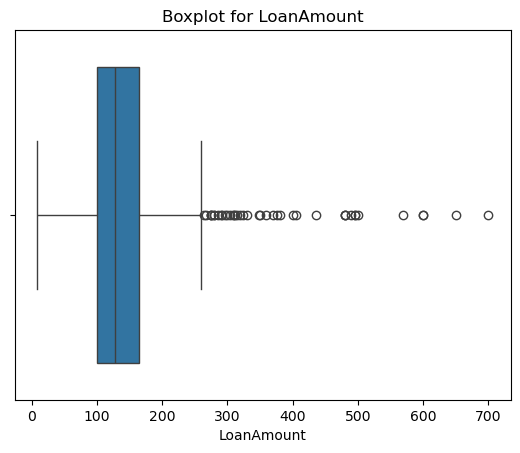

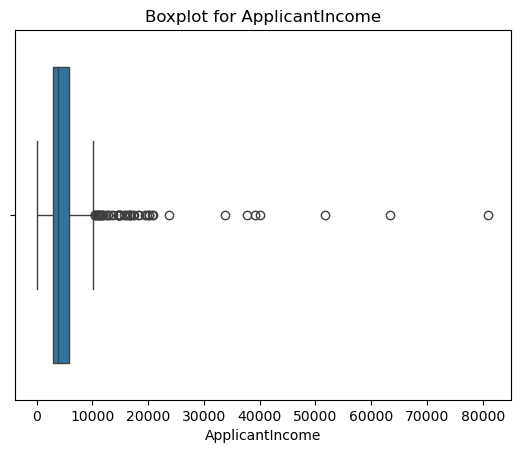

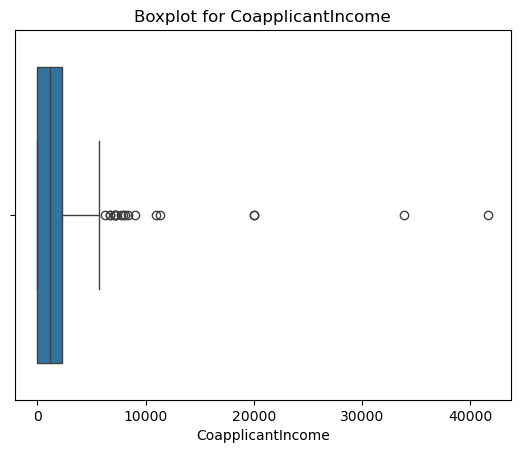

In [19]:
# Box plot for LoanAmount
sns.boxplot(x=df1['LoanAmount'])
plt.title('Boxplot for LoanAmount')
plt.show()

# Box plot for ApplicantIncome
sns.boxplot(x=df1['ApplicantIncome'])
plt.title('Boxplot for ApplicantIncome')
plt.show()


# Box plot for CoapplicantIncome
sns.boxplot(x=df1['CoapplicantIncome'])
plt.title('Boxplot for CoapplicantIncome')
plt.show()

### Check Outlier based on IQR Method

In [20]:
# IQR method for LoanAmount
Q1 = df1['LoanAmount'].quantile(0.25)
Q3 = df1['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers_loanamount = df1[(df1['LoanAmount'] < lower_bound) | (df1['LoanAmount'] > upper_bound)]
print(f"The outlier of Loan_amount is {outliers_loanamount.value_counts().sum()}")

# IQR method for ApplicantIncome
Q1_income = df1['ApplicantIncome'].quantile(0.25)
Q3_income = df1['ApplicantIncome'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

outliers_income = df1[(df1['ApplicantIncome'] < lower_bound_income) | (df1['ApplicantIncome'] > upper_bound_income)]
print(f"The outlier of ApplicantIncome is {outliers_income.value_counts().sum()}")

# IQR method for CoapplicantIncome
Q1_coincome = df1['CoapplicantIncome'].quantile(0.25)
Q3_coincome = df1['CoapplicantIncome'].quantile(0.75)
IQR_coincome = Q3_coincome - Q1_coincome

lower_bound_co_income = Q1_coincome - 1.5 * IQR_coincome
upper_bound_co_income = Q3_coincome + 1.5 * IQR_coincome

outliers_coincome = df1[(df1['CoapplicantIncome'] < lower_bound_co_income) | (df1['CoapplicantIncome'] > upper_bound_co_income)]
print(f"The outlier of CoapplicantIncome is {outliers_coincome.value_counts().sum()}")


The outlier of Loan_amount is 41
The outlier of ApplicantIncome is 50
The outlier of CoapplicantIncome is 18


#### Remove Outlier based on IQR

- The IQR method is effective for removing outliers because it works well with skewed or non-normal data, which is common in real-world datasets. It identifies outliers based on the spread of the middle 50% of the data, making it robust to extreme values without being influenced by them. This simplicity and reliability make it a widely used technique for outlier detection.

In [21]:
# Remove outliers in LoanAmount based on IQR
df1 = df1[(df1['LoanAmount'] >= lower_bound) & (df1['LoanAmount'] <= upper_bound)]

# Remove outliers in ApplicantIncome based on IQR
df1 = df1[(df1['ApplicantIncome'] >= lower_bound_income) & (df1['ApplicantIncome'] <= upper_bound_income)]

# Remove outliers in CoapplicantIncome based on IQR
df1 = df1[(df1['CoapplicantIncome'] >= lower_bound_co_income) & (df1['CoapplicantIncome'] <= upper_bound_co_income)]


#### Recheck Outlier 

In [22]:
# IQR method for LoanAmount
Q1 = df1['LoanAmount'].quantile(0.25)
Q3 = df1['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers_loanamount = df1[(df1['LoanAmount'] < lower_bound) | (df1['LoanAmount'] > upper_bound)]
print(f"The outlier of Loan_amount is {outliers_loanamount.value_counts().sum()}")

# IQR method for ApplicantIncome
Q1_income = df1['ApplicantIncome'].quantile(0.25)
Q3_income = df1['ApplicantIncome'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

outliers_income = df1[(df1['ApplicantIncome'] < lower_bound_income) | (df1['ApplicantIncome'] > upper_bound_income)]
print(f"The outlier of ApplicantIncome is {outliers_income.value_counts().sum()}")

# IQR method for CoapplicantIncome
Q1_coincome = df1['CoapplicantIncome'].quantile(0.25)
Q3_coincome = df1['CoapplicantIncome'].quantile(0.75)
IQR_coincome = Q3_coincome - Q1_coincome

lower_bound_co_income = Q1_coincome - 1.5 * IQR_coincome
upper_bound_co_income = Q3_coincome + 1.5 * IQR_coincome

outliers_coincome = df1[(df1['CoapplicantIncome'] < lower_bound_co_income) | (df1['CoapplicantIncome'] > upper_bound_co_income)]
print(f"The outlier of CoapplicantIncome is {outliers_coincome.value_counts().sum()}")


The outlier of Loan_amount is 17
The outlier of ApplicantIncome is 25
The outlier of CoapplicantIncome is 6


#### Box Plot after remove Outlier 

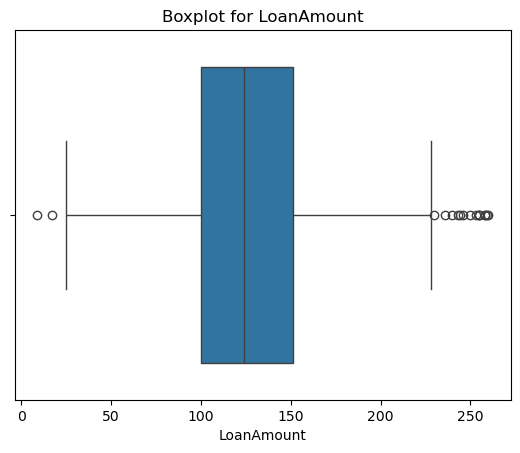

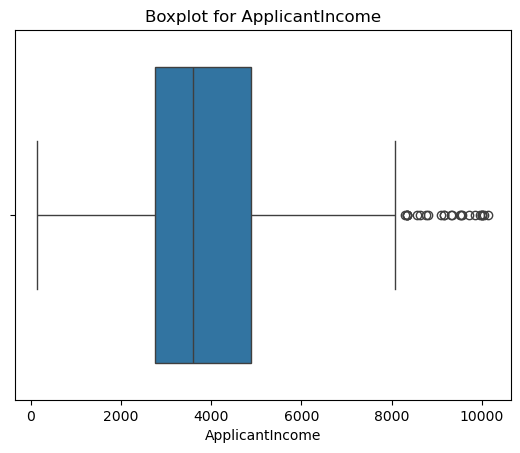

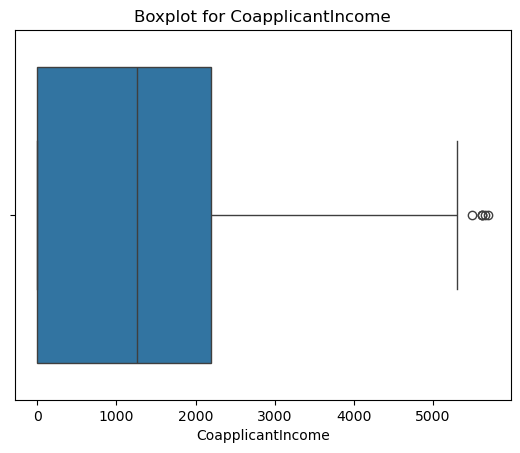

(614, 13)

In [23]:
# Box plot for LoanAmount
sns.boxplot(x=df1['LoanAmount'])
plt.title('Boxplot for LoanAmount')
plt.show()

# Box plot for ApplicantIncome
sns.boxplot(x=df1['ApplicantIncome'])
plt.title('Boxplot for ApplicantIncome')
plt.show()


# Box plot for CoapplicantIncome
sns.boxplot(x=df1['CoapplicantIncome'])
plt.title('Boxplot for CoapplicantIncome')
plt.show()

df.shape

#### Camparing before and After cleaning

#### Before

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB
None


#### After

In [25]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            535 non-null    object 
 1   Gender             535 non-null    object 
 2   Married            535 non-null    object 
 3   Dependents         535 non-null    object 
 4   Education          535 non-null    object 
 5   Self_Employed      535 non-null    object 
 6   ApplicantIncome    535 non-null    float64
 7   CoapplicantIncome  535 non-null    float64
 8   LoanAmount         535 non-null    float64
 9   Loan_Amount_Term   535 non-null    float64
 10  Credit_History     535 non-null    float64
 11  Property_Area      535 non-null    object 
 12  Loan_Status        535 non-null    object 
dtypes: float64(5), object(8)
memory usage: 58.5+ KB
None


### **6. Feature Engineering**

- Since LoanAmount represent the amount of money in thousand, change this into thousand

In [26]:
df1['LoanAmount'] = (df1['LoanAmount'] * 1000)

Additional features are created to better capture applicants’ financial capacity and loan affordability.

In [27]:
df1['TotalIncome'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1['EMI'] = df1['LoanAmount'] / df1['Loan_Amount_Term']
df1['Balance_Income'] = df1['TotalIncome'] - df1['EMI']

df1[['TotalIncome', 'EMI', 'Balance_Income']].head()


,TotalIncome,EMI,Balance_Income
0,5849.0,355.555556,5493.444444
1,6091.0,355.555556,5735.444444
2,3000.0,183.333333,2816.666667
3,4941.0,333.333333,4607.666667
4,6000.0,391.666667,5608.333333


- These engineered features provide more meaningful indicators of repayment ability than raw income values alone. Total income reflects earning capacity, EMI approximates monthly loan burden, and balance income represents remaining disposable income after loan repayment.

### **7. Summary of Data Cleaning**

    1. Handle the Missing value using MEDIAN and MODE

    2. Check Duplicated values

    3. Handle Outlier using IQR
    
    4. Feature Engineering

# III. *Descriptive Statistics*

Descriptive statistics provide a numerical summary of the dataset.

### **1. Overall Descriptive Statistics**

In [28]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,Balance_Income
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,4053.818692,1322.784897,126357.009346,342.616822,0.854206,5376.603589,417.462580,4959.141009
std,1853.376675,1421.206067,44455.650821,65.464295,0.353230,2012.338610,479.861031,1960.373508
min,150.000000,0.000000,9000.000000,12.000000,0.000000,1442.000000,25.000000,-1768.000000
25%,2752.500000,0.000000,100000.000000,360.000000,1.000000,3900.000000,277.777778,3588.722222
50%,3598.000000,1260.000000,124000.000000,360.000000,1.000000,5000.000000,355.555556,4611.666667
75%,4891.000000,2194.000000,151500.000000,360.000000,1.000000,6411.000000,444.444444,5911.444444
max,10139.000000,5701.000000,260000.000000,480.000000,1.000000,13746.000000,9250.000000,13384.888889


This table gives a general overview of the numerical variables in the dataset, such as income and loan amount. It helps us understand the typical values, the spread of the data, and whether there are any unusually large or small values that may affect the analysis.

### **2. Total Income of Applicantion**

In [29]:
# Check the descriptive of the TotalIncome include the median 
check_applicant = df1['TotalIncome'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
check_applicant

count       535.000000
mean       5376.603589
median     5000.000000
std        2012.338610
min        1442.000000
max       13746.000000
Name: TotalIncome, dtype: float64

#### Interpretion

- Right-skewed: Most applicants earn near the median, but a few high incomes raise the average.

- Income Variability: Important for assessing financial stability and loan repayment ability.

### **3. Equated Monthly Installment**

In [30]:
check_emi = df1['EMI'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
check_emi

count      535.000000
mean       417.462580
median     355.555556
std        479.861031
min         25.000000
max       9250.000000
Name: EMI, dtype: float64

#### Interpretion
- High Variability: Some applicants have larger monthly payments, which may affect loan approval.

- Important for Assessing Repayment Capacity: Understanding EMI helps evaluate financial strain.

### **4. Balance Income After EMI**

In [31]:
check_balanceIncome = df1['Balance_Income'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
check_balanceIncome

count       535.000000
mean       4959.141009
median     4611.666667
std        1960.373508
min       -1768.000000
max       13384.888889
Name: Balance_Income, dtype: float64

#### Interpretion

Positive Balance: Most applicants can cover living expenses after EMI.

Negative Balance: A few applicants may struggle financially, affecting loan approval.

### **5. Loan Approval Status Overview**

In [32]:
loan_status_percent_table = (
    df1['Loan_Status']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

loan_status_percent_table.columns = ['Loan Status', 'Percentage (%)']
loan_status_percent_table

,Loan Status,Percentage (%)
0,Y,69.53
1,N,30.47


#### Interpretion

- 69.53% Approval Rate: Majority of loans approved, but 30.47% were rejected.

- Key Factors: EMI and balance income. Higher income, manageable EMI, and positive balance income improve approval chances.

Insight: A deeper analysis of these factors can help refine loan eligibility criteria and improve decision accuracy.

### **6. Camparison by Loan Status**

In [33]:
df1.groupby('Loan_Status')[['TotalIncome', 'EMI', 'Balance_Income']].mean()

,TotalIncome,EMI,Balance_Income
Loan_Status,,,
N,5194.128834,421.720226,4772.408608
Y,5456.558925,415.596998,5040.961926


#### Interpretion

- Higher Income: Increases chances of loan approval.

- Income Alone: Doesn’t guarantee approval—EMI and balance income also matter.

- Rejected Applicants: Tend to have lower incomes and higher EMIs.

### **7. Quantile Summary**

In [34]:
# Assuming your DataFrame is called df1

# Descriptive Statistics for Total Income
total_income = df1['TotalIncome']
total_income_25 = total_income.quantile(0.25)
total_income_median = total_income.quantile(0.50)
total_income_75 = total_income.quantile(0.75)

print(f"Total Income:\n 25%: {total_income_25:.2f}\n 50% (Median): {total_income_median:.2f}\n 75%: {total_income_75:.2f}")

# Descriptive Statistics for EMI
emi = df1['EMI']
emi_25 = emi.quantile(0.25)
emi_median = emi.quantile(0.50)
emi_75 = emi.quantile(0.75)

print(f"\nEMI:\n 25%: {emi_25:.2f}\n 50% (Median): {emi_median:.2f}\n 75%: {emi_75:.2f}")

# Descriptive Statistics for Balance Income
balance_income = df1['Balance_Income']
balance_income_25 = balance_income.quantile(0.25)
balance_income_median = balance_income.quantile(0.50)
balance_income_75 = balance_income.quantile(0.75)

print(f"\nBalance Income:\n 25%: {balance_income_25:.2f}\n 50% (Median): {balance_income_median:.2f}\n 75%: {balance_income_75:.2f}")


Total Income:
 25%: 3900.00
 50% (Median): 5000.00
 75%: 6411.00

EMI:
 25%: 277.78
 50% (Median): 355.56
 75%: 444.44

Balance Income:
 25%: 3588.72
 50% (Median): 4611.67
 75%: 5911.44


#### Overall

- Median Values: Most applicants' total income, EMI, and balance income are centered.

- Significant Variability: Especially in total income and balance income after EMI.

Insight: High variability in financial conditions can influence loan approval.

## IV. *Exploratory Data Analysis (EDA)*

Exploratory Data Analysis is used to visually examine patterns and relationships in the dataset. In this section, visualizations focus on understanding how different factors relate to loan approval status.

**1. Distribution of Applicant Income**

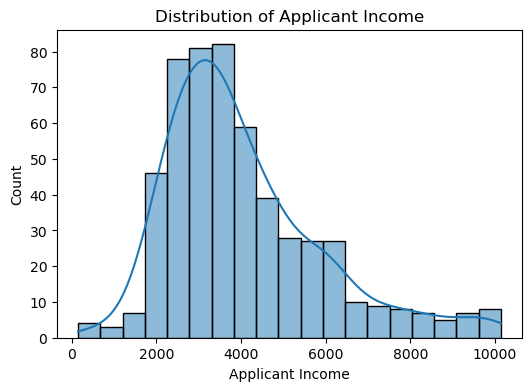

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df1['ApplicantIncome'], kde=True)
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Count")
plt.show()


This histogram helps me see how applicant income is spread out. Most applicants have low to medium income, and only a few have very high income, so the data is not evenly distributed (skewed). Because of that, the median can sometimes describe a “typical” applicant better than the mean.


**2. Loan Approval Distribution**

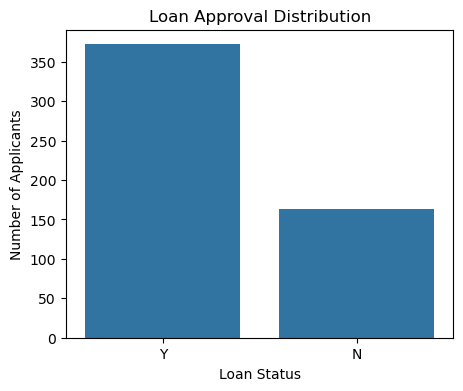

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='Loan_Status', data=df1)
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Applicants")
plt.show()

I used this plot to check how many loans were approved compared to rejected. Approved loans are more common, but rejected cases are still enough to compare with. This helps me make sure the dataset is reasonable for analysis.

**3. Loan Approval by Credit History**

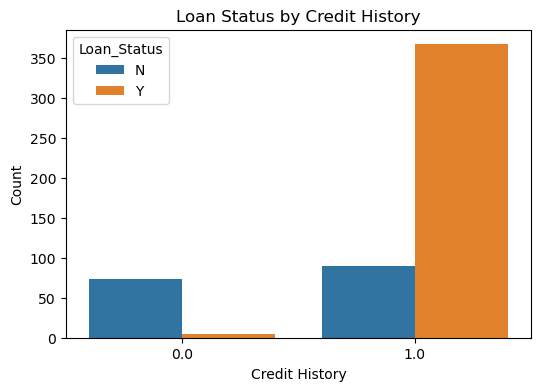

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df1)
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.show()

I used this plot because credit history is usually important in real loan decisions. From the chart, applicants with credit history = 1 get approved much more often. So credit history seems to be one of the strongest factors linked to loan approval in this dataset.

**4. Education Level vs Loan Status**

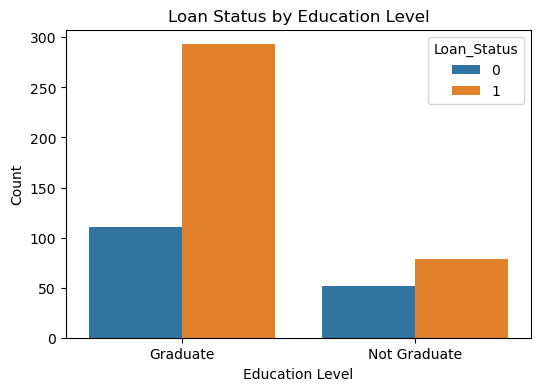

In [57]:
# Create a copy for visualization
df1['Loan_Status'].value_counts(normalize=True) * 100
df_vis = df1.copy()
# Map education values to labels
df_vis['Education'] = df_vis['Education'].map({
    0: 'Not Graduate',
    1: 'Graduate'
})

plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df_vis)
plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

I used this plot to see if education level is related to loan approval. Graduates seem to have slightly more approvals, but the difference is not very big. So education might have some effect, but it doesn’t look as strong as credit history or income-related factors.

**5. Property Area vs Loan Status**

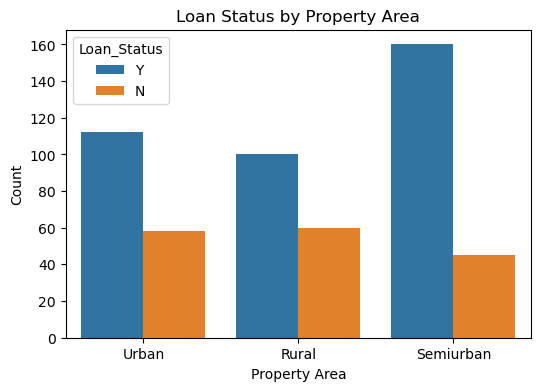

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df1)
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()


This plot compares loan approval across rural, semi-urban, and urban areas. Urban and semi-urban areas show more approved loans than rural areas. This might be related to differences in income or how risk is judged, but this plot mainly shows the pattern, not the exact reason.

**6. Loan Amount vs Loan Status**

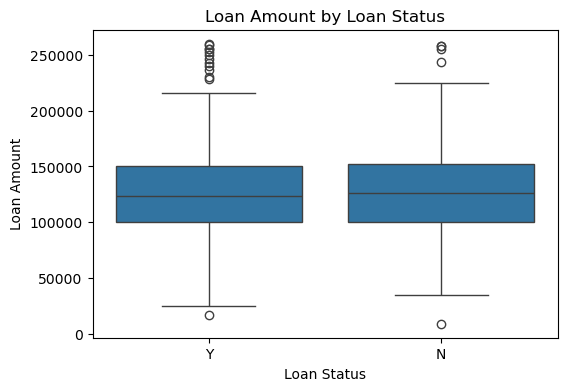

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df1)
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

I used a boxplot here because it makes it easy to compare loan amount between approved and rejected groups and also see outliers. Approved loans seem slightly higher in general, but there is a lot of overlap between the groups. So loan amount alone is not enough to decide approval.

**7. Total Income vs Loan Amount**

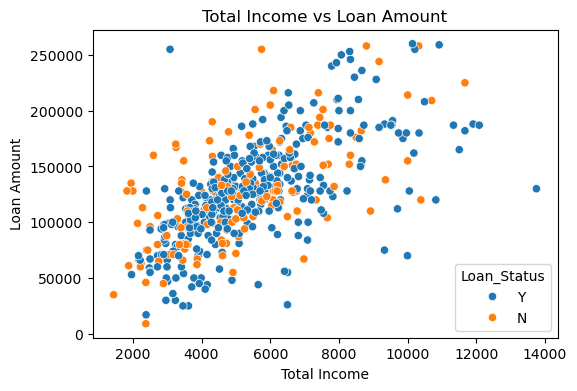

In [41]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='TotalIncome',
    y='LoanAmount',
    hue='Loan_Status',
    data=df1
)
plt.title("Total Income vs Loan Amount")
plt.xlabel("Total Income")
plt.ylabel("Loan Amount")
plt.show()

I used this scatter plot to see the relationship between total income and loan amount. In general, higher income applicants tend to have higher loan amounts. It also looks like approved cases appear more often at higher income levels, which makes sense because repayment ability matters.

**8. Balance Income vs Loan Status**

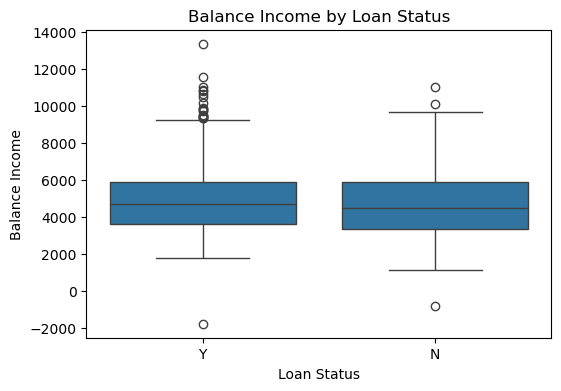

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='Balance_Income', data=df1)
plt.title("Balance Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Balance Income")
plt.show()

I used this plot because balance income shows how much income is left after estimating the loan payment. Approved applicants usually have higher balance income, which suggests they can afford repayment better. This supports the idea that affordability is important in loan approval.

**9. Correlation Heatmap**

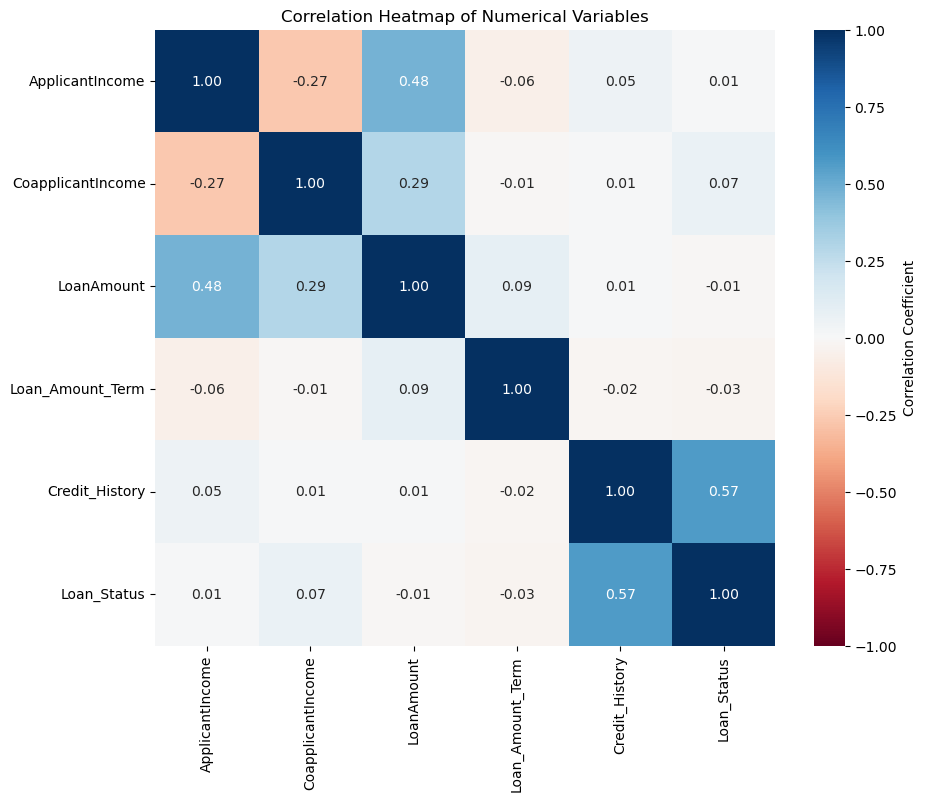

Credit_History vs Loan_Status (r) = 0.567


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
cols = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
    "Loan_Status"
]

# Copy the relevant columns for correlation analysis
df_corr = df1[cols].copy()

# Encode Loan_Status (Y/N -> 1/0)
df_corr["Loan_Status"] = df_corr["Loan_Status"].map({"Y": 1, "N": 0})

# Convert all columns to numeric (important!)
for c in cols:
    df_corr[c] = pd.to_numeric(df_corr[c], errors="coerce")

# Drop rows with missing values in the specified columns
df_corr = df_corr.dropna(subset=cols)

# Generate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,             # Show the correlation values
    fmt=".2f",             # Format the numbers to 2 decimal places
    cmap="RdBu",           # Colormap
    center=0,              # Color midpoint
    vmin=-1, vmax=1,       # Set the range for the color scale
    cbar_kws={'label': 'Correlation Coefficient'}  # Color bar label
)

# Set the title and display the plot
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Extract and print the correlation between Credit_History and Loan_Status
ch_ls = corr_matrix.loc["Credit_History", "Loan_Status"]
print(f"Credit_History vs Loan_Status (r) = {ch_ls:.3f}")


Credit_History shows a moderate positive correlation with Loan_Status, suggesting credit history is strongly associated with loan approval.

The correlation heatmap shows the linear relationships among the numerical variables. The strongest relationship with the target variable (Loan_Status) is Credit_History, which has a moderate positive correlation (r ≈ 0.57). This indicates that applicants with a positive credit history are much more likely to have their loans approved. Most other variables (ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term) have correlations close to 0 with Loan_Status, suggesting they do not have a strong linear relationship with approval in this dataset. Additionally, ApplicantIncome and LoanAmount show a moderate positive correlation (r ≈ 0.48), meaning applicants with higher incomes tend to request larger loan amounts, though this relationship is separate from approval itself.

Overall, the exploratory data analysis shows that loan approval depends on several factors rather than a single variable. Credit history appears to be the strongest factor, followed by income-related variables such as total income and balance income. Other factors like education level, property area, and loan amount show some influence, but their effects are weaker and overlap between approved and rejected cases exists. These insights help explain loan approval patterns in the dataset.

## V. *Machine Learning*

The Objective of ML part is to find "How well can machine learning models predict loan approval based on the other categories or not?"
- **Target variable**: 
    - X: All columns in dataset except Loan_ID and Loan_Status
    - Y: Loan_Status
- **Trian Test Split**: Used train-test split to divide the data into training and testing datasets(20% for test and 80% for train)
- **Model Used**: Logistic Regression
    - Logistic Regression is used for binary classification (loan approved or not). It's a good fit for this task, as you're predicting a binary outcome.
- **Evaluation Matrics**: In Logistics Regression model using accuracy, confusion matrix, and classification report.
    - **Accuracy**, which measures how well the model is predicting correctly. This is a common evaluation metric for classification tasks.
    - **Confusion matrix** and **Classification report**, which are specific to classification problems, providing more details like **precision**, **recall**, and **F1-score**.

### **1. What is Logistic Regression?**

**Logistic Regression** is a linear model used for binary classification problems. It predicts the probability that a given input belongs to one of two classes. In this case, it will predict whether a loan will be approved (1) or rejected (0) based on the input features.

Logistic Regression works by finding the best-fit line (decision boundary) that separates the two classes in the feature space. The output is a probability value (between 0 and 1), and typically, any value greater than 0.5 is classified as class 1 (loan approval), while values less than 0.5 are classified as class 0 (loan rejection).

**Overall**

From the visual analysis, credit history and financial capacity (income and balance income) appear to have a strong relationship with loan approval. Other factors such as education and property area show some differences, but their impact seems weaker compared to credit and income-related variables.

In [44]:
# Import necessary libraries
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
warnings.filterwarnings("ignore")

**Use df1** which is stored the cleaned data.

**First** Encode categorical features

In [45]:
# Step 1: Encode categorical features
df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})
df1['Married'] = df1['Married'].map({'No': 0, 'Yes': 1})
df1['Self_Employed'] = df1['Self_Employed'].map({'No': 0, 'Yes': 1})
df1['Loan_Status'] = df1['Loan_Status'].map({'N': 0, 'Y': 1})
df1['Education'] = df1['Education'].map({'Graduate':1, 'Not Graduate':0})

**Second** encoding for 'Property_Area' (Urban, Rural, Semiurban)

In [46]:
# Step 2: One-hot encoding for 'Property_Area' (Urban, Rural, Semiurban)
df1 = pd.get_dummies(df1, columns=['Property_Area'], drop_first=True)

**Third** Target variables: 
- X: All columns in dataset except Loan_ID and Loan_Status
- Y: Loan_Status

In [47]:
# Step 3: Prepare features (X) and target (y)
X = df1.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = df1['Loan_Status']  # Target variable

**Feature scaling** 
- **StandardScaler** is a class in scikit-learn used to standardize the features (numerical columns) of your dataset
- **fit(X)**: This step calculates the mean and standard deviation of each feature (column) in the dataset X. These statistics will be used to scale the data.
- **transform(X)**: This step then scales the features by subtracting the mean and dividing by the standard deviation.


In [48]:
# Step 4: Feature scaling (Standardization) for numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Trian Test Split**: Used train-test split to divide the data into training and testing datasets(20% for test and 80% for train)

In [49]:
# Step 5: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Use **Logistic Regression model** set default values to 1000

In [50]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

#### **Q1** Can we predict loan approval based on an applicant’s financial and demographic information (income, credit history, education, and employment status)?

In [51]:
# Features for Question 1
X_q1 = X[['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Education', 'Self_Employed']]

In [52]:
# Train-test split for Question 1
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X_q1, y, test_size=0.2, random_state=42)
X_train_scaled_q1 = scaler.fit_transform(X_train_q1)
X_test_scaled_q1 = scaler.transform(X_test_q1)

logreg.fit(X_train_scaled_q1, y_train_q1)
y_pred_q1 = logreg.predict(X_test_scaled_q1)

In [53]:
# Model Evaluation for Question 1 (Financial and Demographic Information)
print(f"Accuracy: {accuracy_score(y_test_q1, y_pred_q1):.4f}")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test_q1, y_pred_q1))
print('\n')
print('='*100)
print("Classification Report:")
print(classification_report(y_test_q1, y_pred_q1))

# Interpretation of Results for Question 1
print("Model Interpretation:")
print(f"The model has an accuracy of {accuracy_score(y_test_q1, y_pred_q1):.2f}, "
      f"which means it correctly predicted the loan approval status "
      f"{accuracy_score(y_test_q1, y_pred_q1)*100:.2f}% of the time.")
print('\n')
print('='*100)
print("From the classification report, we can see:")
print(f"- Precision for loan approval (1): {precision_score(y_test_q1, y_pred_q1, pos_label=1):.2f}")
print(f"- Recall for loan approval (1): {recall_score(y_test_q1, y_pred_q1, pos_label=1):.2f}")
print(f"- F1-score for loan approval (1): {f1_score(y_test_q1, y_pred_q1, pos_label=1):.2f}")


Accuracy: 0.8598
Confusion Matrix:

[[15 15]
 [ 0 77]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        30
           1       0.84      1.00      0.91        77

    accuracy                           0.86       107
   macro avg       0.92      0.75      0.79       107
weighted avg       0.88      0.86      0.84       107

Model Interpretation:
The model has an accuracy of 0.86, which means it correctly predicted the loan approval status 85.98% of the time.


From the classification report, we can see:
- Precision for loan approval (1): 0.84
- Recall for loan approval (1): 1.00
- F1-score for loan approval (1): 0.91


- *The model has a high recall (1.00) for loan approval, which means it correctly identifies 100% of all actual loan approvals. This is very important because it shows that the model can predict all loan approvals without missing any cases.*

- *The precision for loan approval is also quite good (0.84), meaning that when the model predicts loan approval, it’s correct 84% of the time. It does make some mistakes, but it’s still quite reliable.*

#### **Q2** How accurately can we predict loan approval using an applicant’s credit history and income (applicant and coapplicant)?

In [54]:
# **2. Predict Loan Approval Using Credit History and Income**

# Features for Question 2
X_q2 = X[['Credit_History', 'ApplicantIncome', 'CoapplicantIncome']]

# Train-test split for Question 2
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_q2, y, test_size=0.2, random_state=42)
X_train_scaled_q2 = scaler.fit_transform(X_train_q2)
X_test_scaled_q2 = scaler.transform(X_test_q2)

logreg.fit(X_train_scaled_q2, y_train_q2)
y_pred_q2 = logreg.predict(X_test_scaled_q2)

In [55]:
# Train and evaluate the model for Question 2
print(f"Accuracy: {accuracy_score(y_test_q2, y_pred_q2):.4f}")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test_q2, y_pred_q2))
print('\n')
print('='*100)
print("Classification Report:")
print(classification_report(y_test_q2, y_pred_q2))

# Interpretation of Results for Question 2
print("Model Interpretation:")
print(f"The model has an accuracy of {accuracy_score(y_test_q2, y_pred_q2):.2f}, "
      f"which means it correctly predicted the loan approval status "
      f"{accuracy_score(y_test_q2, y_pred_q2)*100:.2f}% of the time.")
print('\n')
print('='*100)
print("From the classification report, we can see:")
print(f"- Precision for loan approval (1): {precision_score(y_test_q2, y_pred_q2, pos_label=1):.2f}")
print(f"- Recall for loan approval (1): {recall_score(y_test_q2, y_pred_q2, pos_label=1):.2f}")
print(f"- F1-score for loan approval (1): {f1_score(y_test_q2, y_pred_q2, pos_label=1):.2f}")


Accuracy: 0.8598
Confusion Matrix:

[[15 15]
 [ 0 77]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        30
           1       0.84      1.00      0.91        77

    accuracy                           0.86       107
   macro avg       0.92      0.75      0.79       107
weighted avg       0.88      0.86      0.84       107

Model Interpretation:
The model has an accuracy of 0.86, which means it correctly predicted the loan approval status 85.98% of the time.


From the classification report, we can see:
- Precision for loan approval (1): 0.84
- Recall for loan approval (1): 1.00
- F1-score for loan approval (1): 0.91


- *The Logistic Regression model has an accuracy of 0.86, meaning it correctly predicted loan approval status 85.98% of the time.*

- *Loan Approval (1): The model has good precision (0.84) and perfect recall (1.00), meaning it does a great job predicting loan approvals.*

- *Loan Rejection (0): The model has perfect precision (1.00) for loan rejections, but its recall (0.50) for this class is low, meaning it misses 50% of the actual rejections.*

#### **Q3. Can we predict loan approval based on the applicant’s property area and education level?**

In [ ]:
# **Combine Features for Question 3 and 4**
# Combine the relevant features for property area, education level, and employment status
X_combined = X[['Property_Area_Urban', 'Property_Area_Semiurban', 'Education']]

# Train-test split for the combined features
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scaling the features
X_train_scaled_combined = scaler.fit_transform(X_train_combined)
X_test_scaled_combined = scaler.transform(X_test_combined)

# Fit the Logistic Regression model
logreg.fit(X_train_scaled_combined, y_train_combined)

# Predict on the test set
y_pred_combined = logreg.predict(X_test_scaled_combined)

# Train and evaluate the model for the combined features
print(f"Accuracy: {accuracy_score(y_test_combined, y_pred_combined):.4f}")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test_combined, y_pred_combined))
print('\n')
print('='*100)
print("Classification Report:")
print(classification_report(y_test_combined, y_pred_combined))

# Interpretation of Results for the Combined Features
print("Model Interpretation:")
print(f"The model has an accuracy of {accuracy_score(y_test_combined, y_pred_combined):.2f}, "
      f"which means it correctly predicted the loan approval status "
      f"{accuracy_score(y_test_combined, y_pred_combined)*100:.2f}% of the time.")
print('\n')
print('='*100)
print("From the classification report, we can see:")
print(f"- Precision for loan approval (1): {precision_score(y_test_combined, y_pred_combined, pos_label=1):.2f}")
print(f"- Recall for loan approval (1): {recall_score(y_test_combined, y_pred_combined, pos_label=1):.2f}")
print(f"- F1-score for loan approval (1): {f1_score(y_test_combined, y_pred_combined, pos_label=1):.2f}")


Accuracy: 0.7196
Confusion Matrix:

[[ 0 30]
 [ 0 77]]


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.72      1.00      0.84        77

    accuracy                           0.72       107
   macro avg       0.36      0.50      0.42       107
weighted avg       0.52      0.72      0.60       107

Model Interpretation:
The model has an accuracy of 0.72, which means it correctly predicted the loan approval status 71.96% of the time.


From the classification report, we can see:
- Precision for loan approval (1): 0.72
- Recall for loan approval (1): 1.00
- F1-score for loan approval (1): 0.84


- The model has perfect recall (1.00) for loan approval, correctly identifying all approved loans, which is crucial for the approval process.

- Precision for loan approval is 0.72, meaning the model is correct 72% of the time when predicting approvals.

- With an accuracy of 0.72, the model is somewhat biased towards approving loans, as it struggles to predict rejections (precision and recall for rejections are 0.00).

- The F1-score for loan approval is 0.84, showing a good balance between precision and recall, but there's room for improvement in rejection predictions.

## *VI. Conclusion and Recommendations*

#### **1. Conclusion**

- The main goal of this project was to understand which factors affect loan approval decisions by analyzing a loan application dataset. To do this, we cleaned the data, looked at descriptive statistics, and explored the data using different visualizations.

- From the results, credit history clearly stands out as the most important factor. Applicants with a positive credit history were much more likely to get their loans approved. This pattern appeared consistently in both the statistics and the plots.

- Income-related factors also played an important role. Applicants with approved loans usually had higher total income and higher balance income, which means they had more money left after paying their loan installments. This shows that affordability is an important consideration in loan approval.

- Other factors like education level and property area showed some differences in approval rates, but the effect was not very strong. Compared to credit history and income, these factors seem less important in deciding whether a loan is approved.

- Overall, the objectives of this project were achieved, and the analysis helped identify the main factors that influence loan approval decisions.

#### **2. Recommendations**

Based on the analysis, a few simple recommendations can be made:

- Credit history should be given high priority since it has a strong relationship with loan approval.

- Income and affordability measures, such as balance income, should be considered together with loan amount.

- Factors like education and property area can be used as additional information, but they should not be the main decision factors.

- In the future, more detailed financial data or advance machine learning models could be used to improve the analysis.

#### **3. Limitations and Future Work**

This project also has some limitations. The dataset is not very large and comes from only one source, so the results may not represent all loan applicants. In addition, the EMI calculation used in this analysis is simplified and does not include interest rates.

For future work, using more detailed financial information or applying advance machine learning models could help provide more accurate and deeper insights.